<h1 style="color: #FF8C00;">Portfolio Analyst. Prueba Python.</h1>

---

La siguiente prueba consistirá en hacer una serie de cálculos y gráficos para analizar un conjunto de activos financieros.

Para ello deberás desarrollar el código necesario que permita realizar cada una de las tareas.


<h2 style="color: #FF6347;">Import de librerías a usar</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


<h1 style="color: #FF8C00;">Ejercicio 1. Carga de datos y gráfico de precios.</h1>

En este primer ejercicio debes cargar el fichero que contiene los precios de los activos financieros a analizar. Este fichero se llama `financial_assets_prices.csv`.

Una vez cargados los precios de los activos, debes pintarlos en un gráfico temporal. Ten en cuenta que para que puedan ser comparados deben comenzar todas las series en el mismo valor.

<h2 style="color: #FF6347;">Carga de datos</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [6]:
df = pd.read_csv(r"C:\Users\hugoe\Downloads\Quest_ mini project-20241104T160205Z-001\Quest_ mini project\financial_assets_prices.csv")
df.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  770 non-null    float64
 2   Asset2  770 non-null    float64
 3   Asset3  770 non-null    float64
 4   Asset4  734 non-null    float64
 5   Asset5  763 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB


In [8]:
df.columns


Index(['date', 'Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'], dtype='object')

In [9]:
df["date"] = pd.to_datetime(df["date"])



In [10]:
df = df.dropna(subset=["Asset1", "Asset2", "Asset3", "Asset4", "Asset5"])



In [11]:
df.set_index("date", inplace=True)


In [12]:
df_normalized = df / df.iloc[0] * 100


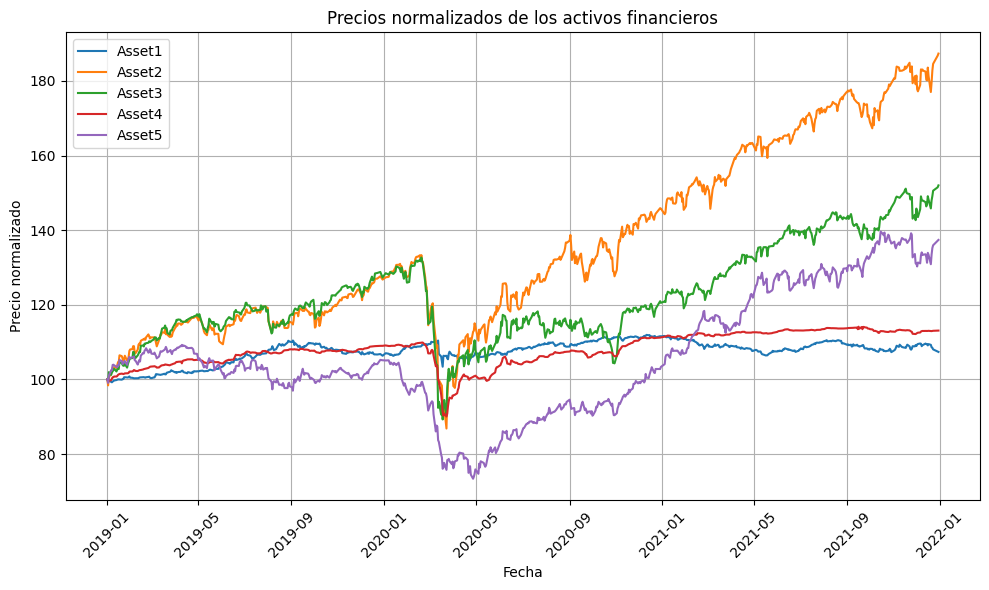

In [13]:
plt.figure(figsize=(10, 6))
for column in df_normalized.columns:
    plt.plot(df_normalized.index, df_normalized[column], label=column)

plt.title("Precios normalizados de los activos financieros")
plt.xlabel("Fecha")
plt.ylabel("Precio normalizado")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 2. Rendimientos diarios porcentuales.</h1>

En este segundo ejercicio debes calcular los rendimientos diarios porcentuales de cada uno de los activos y obtener la siguiente información de ellos:
- Calcular la matriz de correlaciones entre los 5 activos.
- Realizar un gráfico de dispersión entre los rendimientos de 2 activos.

<h2 style="color: #FF6347;">Cálculo de rendimientos diarios.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [16]:
df1 = pd.read_csv(r"C:\Users\hugoe\Downloads\Quest_ mini project-20241104T160205Z-001\Quest_ mini project\financial_assets_prices.csv")
df1

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,NaN,70.11
779,2021-12-28,249.9368,104.526,39.115000,NaN,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


In [17]:
df1["date"] = pd.to_datetime(df1["date"])
df1


,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,NaN,70.11
779,2021-12-28,249.9368,104.526,39.115000,NaN,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


In [18]:
df1.set_index("date", inplace=True)


In [19]:
df_returns = df1.pct_change() * 100
df_returns

C:\Users\hugoe\AppData\Local\Temp\ipykernel_8868\2502829604.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_returns = df1.pct_change() * 100


,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221
2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175
2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179
...,...,...,...,...,...
2021-12-27,-0.091306,0.738415,0.543901,0.000000,1.344319
2021-12-28,0.006442,0.548309,0.759918,0.000000,-0.114106
2021-12-29,-0.486243,-0.158812,-0.664707,0.017523,-0.314151


<h2 style="color: #FF6347;">Cálculo de la matriz de correlaciones.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [21]:
correlation_matrix = df_returns.corr()
correlation_matrix 

,Asset1,Asset2,Asset3,Asset4,Asset5
Asset1,1.000000,-0.088341,-0.061253,0.102252,-0.106484
Asset2,-0.088341,1.000000,0.852491,0.526634,0.591399
Asset3,-0.061253,0.852491,1.000000,0.511550,0.557414
Asset4,0.102252,0.526634,0.511550,1.000000,0.421155
Asset5,-0.106484,0.591399,0.557414,0.421155,1.000000


<h2 style="color: #FF6347;">Gráfico de dispersión entre los rendimientos de 2 activos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

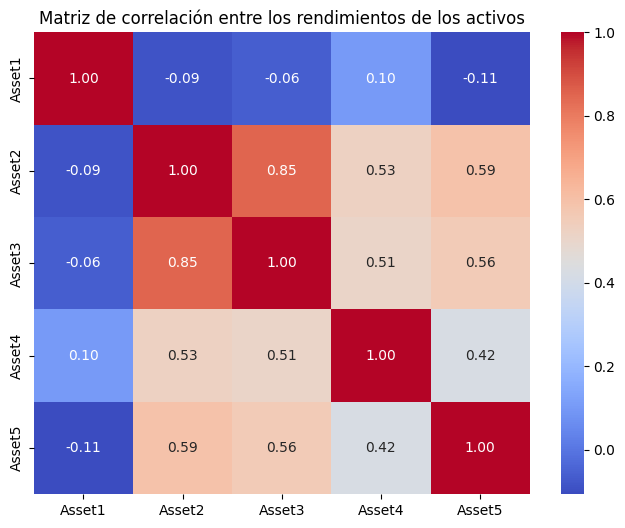

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de correlación entre los rendimientos de los activos")
plt.show()

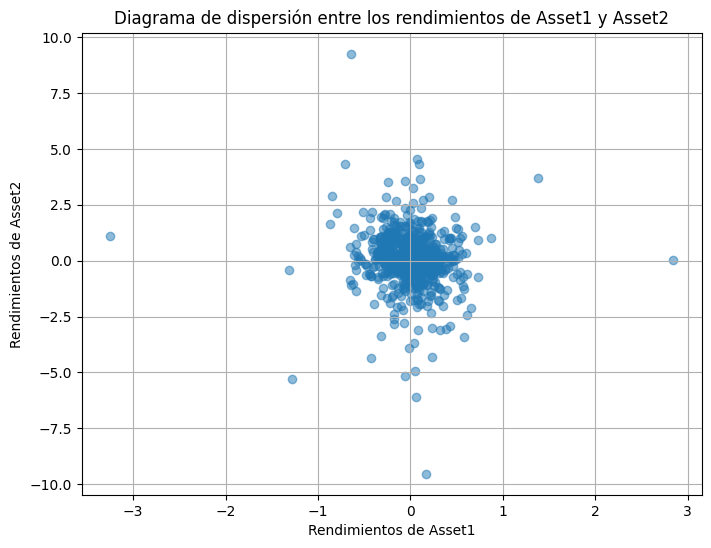

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df_returns["Asset1"], df_returns["Asset2"], alpha=0.5)
plt.title("Diagrama de dispersión entre los rendimientos de Asset1 y Asset2")
plt.xlabel("Rendimientos de Asset1")
plt.ylabel("Rendimientos de Asset2")
plt.grid(True)
plt.show()

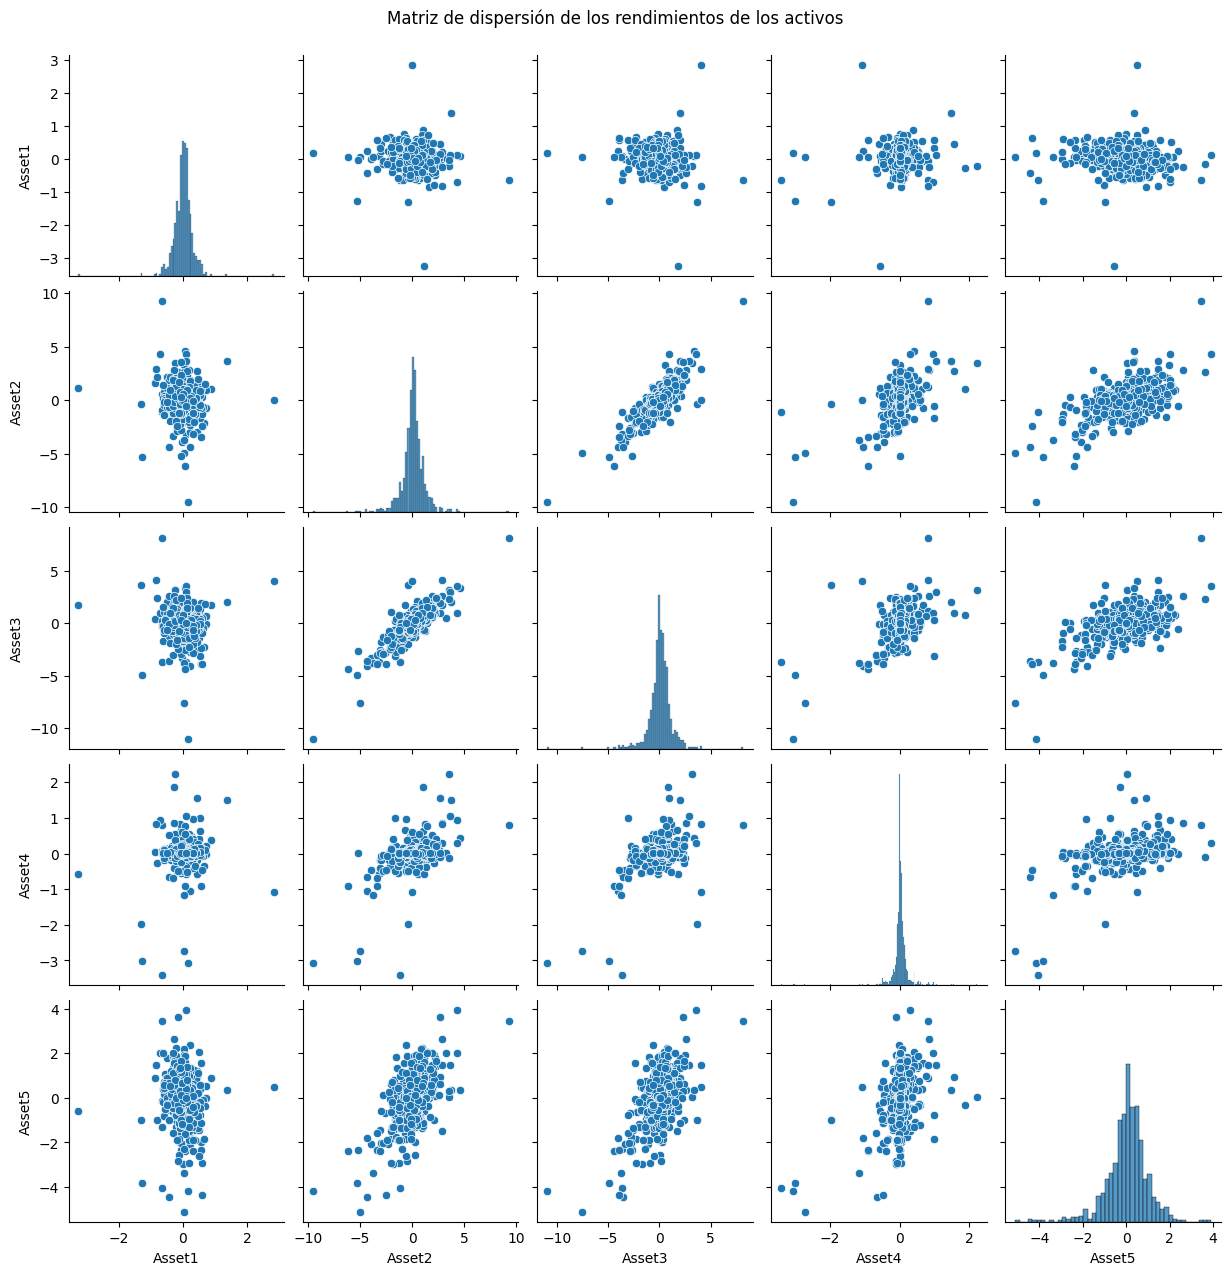

In [25]:
sns.pairplot(df_returns)
plt.suptitle("Matriz de dispersión de los rendimientos de los activos", y=1.02)
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 3. Análisis de una cartera</h1>

Este tercer ejercicio consiste en calcular y analizar los resultados de una cartera. Para ello será necesario cargar el fichero con los pesos que tiene cada uno de los activos en cada uno de los días. Este fichero se llama `portfolio_weights.csv`.

Para completar el ejercicio, será necesario calcular:
- Gráfico de área de los pesos.
- Gráfico de la rentabilidad histórica acumulada de la cartera.
- Rentabilidad anualizada de la cartera.
- Volatilidad anualizada de la cartera. (Puedes usar el factor de anualización de 261 días)

Extra: Gráfico de área de los pesos de los activos agrupándolos por familia. Esta información está contenida en el fichero `financial_assets_information.csv`.

<h2 style="color: #FF6347;">Gráfico de área de los pesos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [28]:
df2 = pd.read_csv(r"C:\Users\hugoe\Downloads\Quest_ mini project-20241104T160205Z-001\Quest_ mini project\portfolio_weights.csv")
df2.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [29]:
df3 = pd.read_csv(r"C:\Users\hugoe\Downloads\Quest_ mini project-20241104T160205Z-001\Quest_ mini project\financial_assets_information.csv")
df3.head()

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [30]:
df2["date"] = pd.to_datetime(df2["date"])


In [31]:
df2.set_index("date", inplace=True)


<Figure size 1200x600 with 0 Axes>

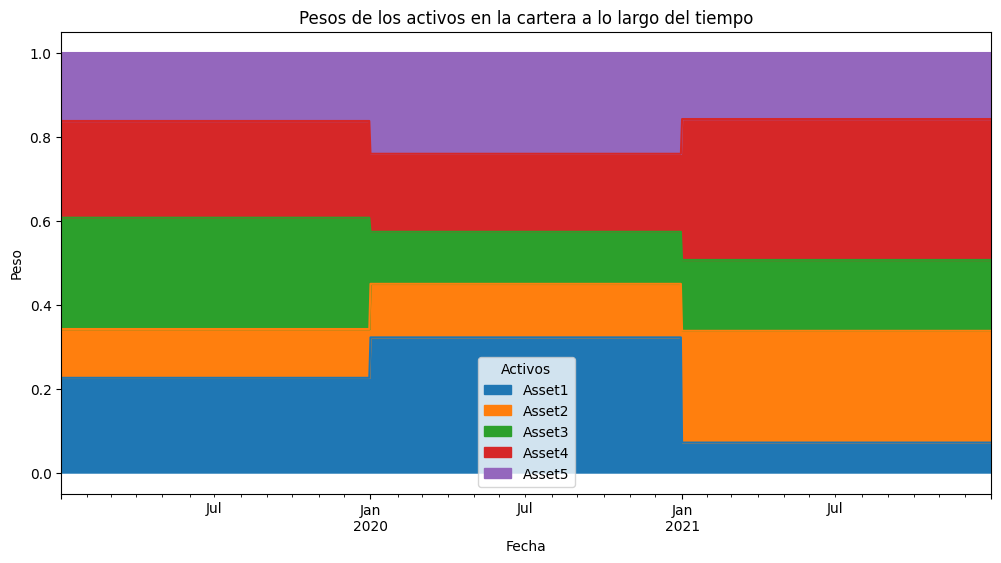

In [32]:
plt.figure(figsize=(12, 6))
df2.plot.area(stacked=True, figsize=(12, 6))
plt.title("Pesos de los activos en la cartera a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Peso")
plt.legend(title="Activos")
plt.show()

<h2 style="color: #FF6347;">Gráfico de la rentabilidad histórica acumulada de la cartera.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [34]:
np.random.seed(42) 
df_returns_simulated = pd.DataFrame(np.random.normal(0, 0.01, size=df2.shape), columns=df2.columns, index=df2.index)
df_returns_simulated

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,0.004967,-0.001383,0.006477,0.015230,-0.002342
2019-01-03,-0.002341,0.015792,0.007674,-0.004695,0.005426
2019-01-04,-0.004634,-0.004657,0.002420,-0.019133,-0.017249
2019-01-07,-0.005623,-0.010128,0.003142,-0.009080,-0.014123
2019-01-08,0.014656,-0.002258,0.000675,-0.014247,-0.005444
...,...,...,...,...,...
2021-12-27,0.006929,0.005826,-0.007999,-0.019080,-0.003931
2021-12-28,0.010016,0.013935,0.007105,0.004293,0.003796
2021-12-29,-0.005561,-0.001301,0.016691,-0.009426,0.016148


In [35]:
portfolio_returns = (df2 * df_returns_simulated).sum(axis=1)
portfolio_returns

date
2019-01-02    0.005802
2019-01-03    0.003145
2019-01-04   -0.008163
2019-01-07   -0.006005
2019-01-08   -0.000948
                ...   
2021-12-27   -0.006329
2021-12-28    0.007663
2021-12-29    0.001469
2021-12-30    0.001722
2021-12-31   -0.003932
Length: 783, dtype: float64

In [36]:
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns

date
2019-01-02    0.005802
2019-01-03    0.008965
2019-01-04    0.000729
2019-01-07   -0.005281
2019-01-08   -0.006224
                ...   
2021-12-27    0.164380
2021-12-28    0.173302
2021-12-29    0.175026
2021-12-30    0.177049
2021-12-31    0.172421
Length: 783, dtype: float64

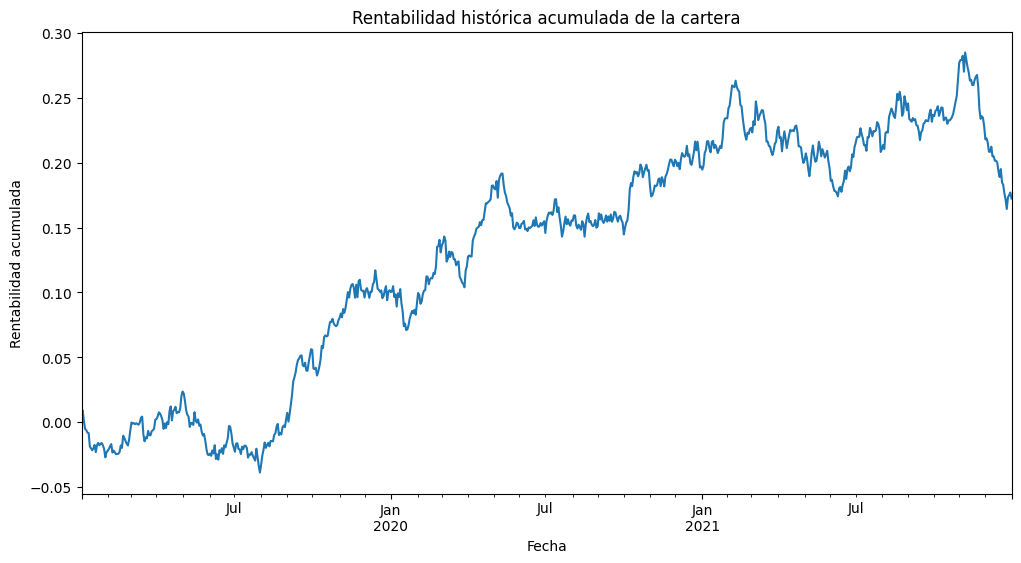

In [37]:
plt.figure(figsize=(12, 6))
cumulative_returns.plot()
plt.title("Rentabilidad histórica acumulada de la cartera")
plt.xlabel("Fecha")
plt.ylabel("Rentabilidad acumulada")
plt.show()

<h2 style="color: #FF6347;">Rentabilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [39]:
total_return = cumulative_returns[-1]
total_return 

C:\Users\hugoe\AppData\Local\Temp\ipykernel_8868\126071634.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = cumulative_returns[-1]


0.17242069709883334

In [40]:
n_days = len(portfolio_returns)
n_days

783

In [41]:
annualized_return = (1 + total_return) ** (261 / n_days) - 1
annualized_return

0.05445445379088221

<h2 style="color: #FF6347;">Volatilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [43]:
daily_volatility = portfolio_returns.std()
daily_volatility

0.004647446664400236

In [44]:
annualized_volatility = daily_volatility * (261 ** 0.5)
annualized_volatility

0.07508179866048836

<h2 style="color: #FF6347;">Extra. Gráfico de área de los pesos de los activos agrupándolos por familia.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [46]:
df3.columns

Index(['Name', 'Family'], dtype='object')

In [47]:
df2.columns = df2.columns.str.upper()  
df3["Name"] = df3["Name"].str.upper()

In [48]:
df2_long = df2.reset_index().melt(id_vars=["date"], var_name="Asset", value_name="Weight")  # Usamos 'Date' aquí
df2_long = df2_long.merge(df3[["Name", "Family"]], left_on="Asset", right_on="Name", how="left")



In [49]:
df2_family = df2_long.groupby(["date", "Family"])["Weight"].sum().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

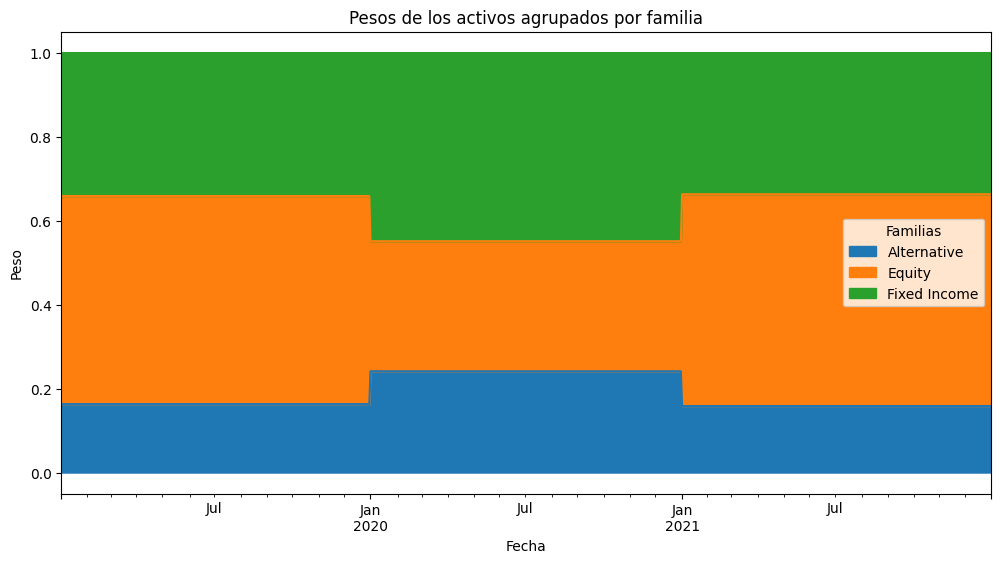

In [50]:
plt.figure(figsize=(12, 6))
df2_family.plot.area(stacked=True, figsize=(12, 6))
plt.title("Pesos de los activos agrupados por familia")
plt.xlabel("Fecha")
plt.ylabel("Peso")
plt.legend(title="Familias")
plt.show()